In [ ]:
from fastai2_resnet_audio.model import *
from fastai2_resnet_audio.data import *
from fastai2.vision.all import *

# fastai2-resnet-audio tutorial

> Tutorial for fastai2-resnet-audio - Dataset used: https://github.com/earthspecies/open_collaboration_on_audio_classification/blob/master/introduction.ipynb

In [ ]:
path = untar_data('https://storage.googleapis.com/ml-animal-sounds-datasets/macaques_24414Hz.zip')
path

## DataLoaders

Create DataBlock and DataLoaders with AudioBlock and AudioTransforms

In [ ]:
length = 0.5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dblocks = DataBlock(blocks = (AudioBlock,CategoryBlock),
                 get_items=get_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label,
                 item_tfms=[AudioRandomCrop(length=length),
                            AudioFixLength(length=length),
                           ],
                 batch_tfms=[AudioAddNoise(device=device)]
                 )

dls=dblocks.dataloaders(path, bs=128)

In [ ]:
dls.one_batch()

(TensorAudio([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[-0.1468, -0.1665, -0.1835,  ...,  0.1486,  0.1570,  0.1633]],
 
         [[-0.4072, -0.4066, -0.3974,  ...,  0.0185,  0.0194,  0.0201]],
 
         ...,
 
         [[ 0.0982,  0.1147,  0.1300,  ..., -0.0129, -0.0162, -0.0194]],
 
         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[-0.0472, -0.0186,  0.0118,  ..., -0.1656, -0.1618, -0.1542]]]),
 TensorCategory([2, 6, 2, 1, 6, 0, 0, 2, 4, 0, 6, 0, 3, 6, 6, 4, 2, 3, 7, 1, 4, 0, 5, 3,
         1, 7, 6, 4, 0, 6, 3, 2, 7, 5, 4, 3, 2, 0, 0, 6, 0, 7, 1, 4, 4, 2, 6, 0,
         3, 6, 5, 0, 4, 6, 2, 5, 3, 3, 4, 4, 2, 7, 3, 7, 6, 5, 1, 5, 2, 5, 6, 1,
         6, 3, 2, 6, 6, 6, 0, 2, 7, 5, 7, 0, 7, 3, 5, 6, 4, 1, 6, 4, 2, 2, 6, 0,
         1, 1, 5, 6, 6, 2, 3, 6, 4, 0, 4, 4, 2, 5, 2, 6, 5, 0, 3, 7, 4, 6, 3, 3,
         6, 6, 4, 6, 5, 7, 2, 4]))

## Model

Create **model configuration** - available configurations are resnet1d18 and resnet1d34.

You have to adopt the **num_classes** parameter according to the number of classes of your dataset (8 classes for this dataset).

In [ ]:
config = resnet1d18
config['num_classes'] = 8

In [ ]:
config

{'block': fastai2_resnet_audio.model.ResidualBlock,
 'layers': [2, 2, 2, 2],
 'in_channels': 64,
 'kernel_size': 15,
 'stride': 4,
 'num_classes': 8}

Create **model** using config

In [ ]:
model = ResNetAudio(**config)

## Learner + Training

Creating the **learner and trainig** the model is straight forward.

In [ ]:
learn = Learner(dls, model, metrics=accuracy, cbs=ShowGraphCallback())

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00013182566908653826)

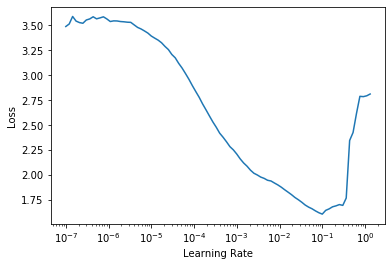

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.862051,3.277663,0.471517,07:18
1,0.594956,0.480940,0.845573,07:23
2,0.425126,0.299941,0.903226,07:38
3,0.304561,0.304931,0.892244,07:42


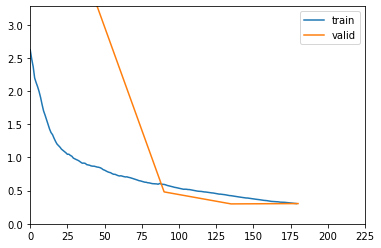

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-3)